In [ ]:
from google.colab import files
files.upload()

!rm -r ~/.kaggle
!rm -r ~/content
!mkdir ~/.kaggle
!mkdir ~/content
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste

import zipfile
zip_ref = zipfile.ZipFile('sea-animals-image-dataste.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
rm: cannot remove '/root/content': No such file or directory
 99% 308M/312M [00:02<00:00, 104MB/s]
100% 312M/312M [00:03<00:00, 108MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random
import numpy as np
import os
import shutil

In [ ]:
dataset_path = "/content/"
train_path = "/content/train"
val_path = "/content/val"
test_path = "/content/test"

if not os.path.exists(train_path):
    os.mkdir(train_path)

if not os.path.exists(val_path):
    os.mkdir(val_path)

if not os.path.exists(test_path):
    os.mkdir(test_path)

In [ ]:
IMG_SIZE=256
labels = ['Penguin', 'Starfish', 'Sea Rays', 'Crabs', 'Otter', 'Whale']

In [ ]:
for label in labels:
    label_full_path = os.path.join(dataset_path, label)

    images_path = os.listdir(label_full_path)

    images = [i for i in images_path if i.endswith(".jpg")]

    random.shuffle(images)
    split_size = 0.8
    val_size = 0.1
    train_len = int(len(images) * split_size)
    val_len = train_len + int(len(images) * val_size)
    train_images = images[:train_len]
    val_images = images[train_len:val_len]
    test_images = images[val_len:]

    label_train_path = os.path.join(train_path, label)
    label_val_path = os.path.join(val_path, label)
    label_test_path = os.path.join(test_path, label)

    if not os.path.exists(label_train_path):
        os.mkdir(label_train_path)

    if not os.path.exists(label_val_path):
        os.mkdir(label_val_path)

    if not os.path.exists(label_test_path):
        os.mkdir(label_test_path)

    for im in train_images:
        shutil.copy(os.path.join(label_full_path, im), label_train_path)

    for im in val_images:
        shutil.copy(os.path.join(label_full_path, im), label_val_path)

    for im in test_images:
        shutil.copy(os.path.join(label_full_path, im), label_test_path)

In [ ]:
batch_size = 32

datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds = datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    classes=labels,
    batch_size=batch_size
)

val_ds = test_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    classes=labels,
    batch_size=batch_size
)

test_ds = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    classes=labels,
    batch_size=batch_size
)

Found 2444 images belonging to 6 classes.
Found 302 images belonging to 6 classes.
Found 312 images belonging to 6 classes.


In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(32, 3, activation ='relu', padding='same', input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 3, padding='same',activation ='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, 3, padding='same',activation ='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, 3, padding='same',activation ='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(len(labels), activation = "softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

In [ ]:
history = model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
77/77 [==============================] - 54s 572ms/step - loss: 1.5064 - accuracy: 0.4141 - val_loss: 1.1192 - val_accuracy: 0.5530
Epoch 2/30
77/77 [==============================] - 44s 565ms/step - loss: 1.1051 - accuracy: 0.5618 - val_loss: 1.0265 - val_accuracy: 0.6093
Epoch 3/30
77/77 [==============================] - 44s 566ms/step - loss: 1.0472 - accuracy: 0.5757 - val_loss: 0.9427 - val_accuracy: 0.6424
Epoch 4/30
77/77 [==============================] - 43s 563ms/step - loss: 1.0056 - accuracy: 0.6039 - val_loss: 0.9970 - val_accuracy: 0.6258
Epoch 5/30
77/77 [==============================] - 43s 564ms/step - loss: 0.9997 - accuracy: 0.5974 - val_loss: 0.9240 - val_accuracy: 0.6523
Epoch 6/30
77/77 [==============================] - 42s 551ms/step - loss: 0.9464 - accuracy: 0.6060 - val_loss: 1.0727 - val_accuracy: 0.6192
Epoch 7/30
77/77 [==============================] - 43s 555ms/step - loss: 0.9195 - accuracy: 0.6326 - val_loss: 0.8705 - val_accuracy: 0.6523

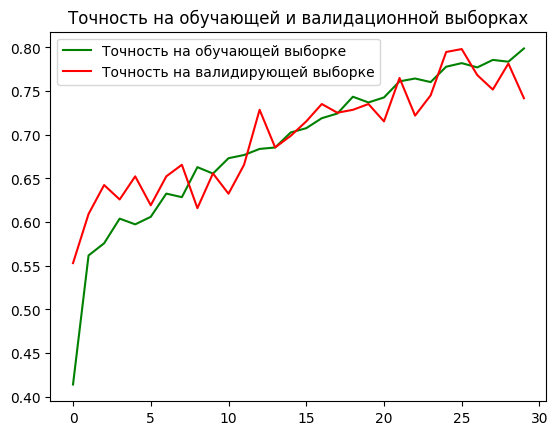

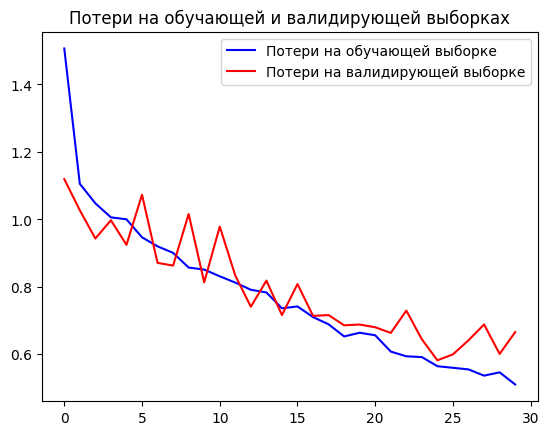

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Точность на обучающей выборке')
plt.plot(epochs, val_accuracy, 'r', label='Точность на валидирующей выборке')

plt.title('Точность на обучающей и валидационной выборках')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss, 'r', label='Потери на валидирующей выборке')

plt.title('Потери на обучающей и валидирующей выборках')
plt.legend()
plt.show()

In [ ]:
_, accuracy = model.evaluate(test_ds)
print("Test accuracy:", accuracy)

10/10 [==============================] - 2s 170ms/step - loss: 0.6280 - accuracy: 0.7756
Test accuracy: 0.7756410241127014
